# Linear Regression

In [1]:
import pandas as pd
comp = pd.read_csv('C:\\Users\\paritosh.tiwari\\Documents\\ETA\\Python\\computer.csv')

In [2]:
comp

,Units,Minutes,Mean
0,1,23,97.21429
1,2,29,97.21429
2,3,49,97.21429
3,4,64,97.21429
4,4,74,97.21429
5,5,87,97.21429
6,6,96,97.21429
7,6,97,97.21429
8,7,109,97.21429
9,8,119,97.21429


Text(0,0.5,'Time Taken')

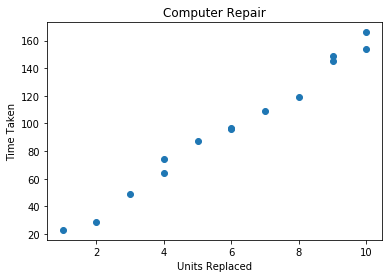

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(comp['Units'], comp['Minutes'])
plt.title('Computer Repair')
plt.xlabel('Units Replaced')
plt.ylabel('Time Taken')

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


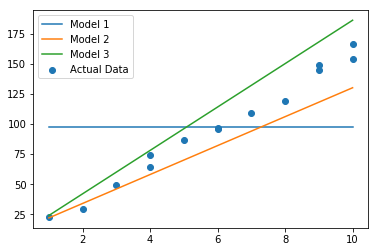

In [4]:
fig, pt = plt.subplots()

pt.scatter(comp['Units'], comp['Minutes'], label = 'Actual Data')

pt.plot(comp['Units'], comp['Mean'], label = 'Model 1')

pt.plot(comp['Units'], 10 + 12*comp['Units'], label = 'Model 2')

pt.plot(comp['Units'], 6 + 18*comp['Units'], label = 'Model 3')

# y = bo + b1x + e
# y!
#(y-y!)^2

pt.legend()

fig.show()

In [5]:
import numpy as np
Error_mdl1 = np.array(comp['Minutes']-comp['Mean'])
Error_mdl1
SSE_mdl1 = np.sum(np.square(Error_mdl1))
print(SSE_mdl1)

27768.357142857403


In [6]:
Error_mdl2 = np.array(comp['Minutes']-(10+12*comp['Units']))
Error_mdl2  
SSE_mdl2 = np.sum(np.square(Error_mdl2))
print(SSE_mdl2)

4993


In [7]:
Error_mdl3 = np.array(comp['Minutes']-(6+18*comp['Units']))
Error_mdl3
SSE_mdl3 = np.sum(np.square(Error_mdl3))
print(SSE_mdl3)

5001


In [8]:
x = comp['Units']
y = comp['Minutes']

xiyi = x*y

n = comp['Units'].count()

xmean = np.mean(comp['Units'])
ymean = np.mean(comp['Minutes'])

numerator = np.sum(xiyi)-n*xmean*ymean

denominator = np.sum(x**2)-n*(xmean**2)

b1 = numerator/denominator
b0 = ymean-b1*xmean

print(b1, b0)

15.508771929824569 4.161654135338296


D:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


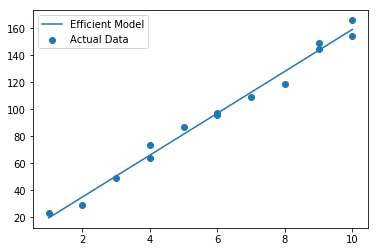

In [9]:
fig, pt = plt.subplots()

pt.scatter(comp['Units'], comp['Minutes'], label = 'Actual Data')

pt.plot(comp['Units'], b0 + b1*comp['Units'], label = 'Efficient Model')

pt.legend()

fig.show()


In [10]:
Error_mdl = np.array(comp['Minutes']-(b0+b1*comp['Units']))
Error_mdl
SSE_mdl = np.sum(np.square(Error_mdl))
print(SSE_mdl)

348.84837092731806


In [11]:
from statsmodels.formula.api  import ols
rst = ols(formula = 'Minutes ~ Units', data = comp).fit()
rst.summary()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           8.92e-13
Time:                        10:55:50   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)

(506, 13)


In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [13]:
df1 = pd.DataFrame(boston.data)
df1.columns = boston.feature_names
df1['PRICE'] = boston.target
print(df1.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [14]:
X1 = df1.drop('PRICE', axis = 1)
print(X1.head(3))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


In [15]:
from sklearn.cross_validation import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
        X1, df1.PRICE, test_size = 0.20, # Test data (20%)
        random_state = 42)

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
import sklearn.cross_validation
help(sklearn.cross_validation)

Help on module sklearn.cross_validation in sklearn:

NAME
    sklearn.cross_validation

DESCRIPTION
    The :mod:`sklearn.cross_validation` module includes utilities for cross-
    validation and performance evaluation.

CLASSES
    BaseShuffleSplit(abc.NewBase)
        ShuffleSplit
            LabelShuffleSplit
        StratifiedShuffleSplit
    _BaseKFold(abc.NewBase)
        KFold
        LabelKFold
        StratifiedKFold
    _PartitionIterator(abc.NewBase)
        LeaveOneLabelOut
        LeaveOneOut
        LeavePLabelOut
        LeavePOut
        PredefinedSplit
    
    class KFold(_BaseKFold)
     |  K-Folds cross validation iterator.
     |  
     |  .. deprecated:: 0.18
     |      This module will be removed in 0.20.
     |      Use :class:`sklearn.model_selection.KFold` instead.
     |  
     |  Provides train/test indices to split data in train test sets. Split
     |  dataset into k consecutive folds (without shuffling by default).
     |  
     |  Each fold is then used

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Text(0,0.5,'Predicted Price')

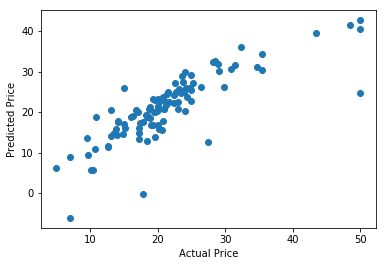

In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
t = lm.fit(X1_train, y1_train)

pred_test = t.predict(X1_test)

plt.scatter(y1_test,pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [17]:
from sklearn import metrics

mse = metrics.mean_squared_error(y1_test, pred_test)
print(mse)

24.311426929693663


D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     755.6
Date:                Tue, 14 Aug 2018   Prob (F-statistic):          1.17e-267
Time:                        11:20:48   Log-Likelihood:                -1208.6
No. Observations:                 404   AIC:                             2443.
Df Residuals:                     391   BIC:                             2495.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0995      0.036     -2.786      0.0

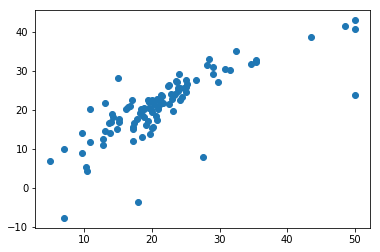

In [17]:
import statsmodels.api as stmodel

model1=stmodel.OLS(y1_train,X1_train)

rst = model1.fit()

pred_test = rst.predict(X1_test)

plt.scatter(y1_test,pred_test)

print(rst.summary())

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

adt = pd.read_csv("C:\\Users\\paritosh.tiwari\\Documents\\ETA\\Python\\adult.csv",  
                  names = ["age", "workclass", "fnlwgt", 
                           "education", 
                           "education-num", "marital-status",
                           "occupation", "relationship", "race", 
                           "gender", "capital-gain", "capital-loss", 
                           "hours-per-week", "native-country", 
                           "AnnualIncome"])
print(adt.head(5))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country AnnualIncome  
0          2174             0              40   United-States  

In [21]:
pattern = r'[?]'

In [22]:
import numpy as np
print(adt.shape)
adt = adt.replace(pattern, np.nan, regex = True) #NaN
adt = adt.dropna()
print(adt.shape)
adt.head(5)

(32561, 15)
(30162, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,AnnualIncome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
X = adt.filter(['age', 'education-num', "capital-gain", 
                "capital-loss", 
                           "hours-per-week"], axis = 1)
y = adt.iloc[:,14]
print(y.shape)
print(X.shape)

(30162,)
(30162, 5)


In [26]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print(x_train.shape)
print(y_train.shape)
30162-24129

(24129, 5)
(24129,)


6033

# # Logistic Regression

In [27]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lrmod = lr.fit(x_train, y_train)
y_predict = lrmod.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_predict, y_test))
print(accuracy_score(y_predict, y_test))
(4335 + 535)/(4335 + 535 + 231 +932)


[[4335  932]
 [ 231  535]]
0.8072269186142881


0.8072269186142881

# # KNN

In [31]:
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_knn = pd.DataFrame(scale(X), columns=['age', 'education-num', 
                                   "capital-gain", "capital-loss", 
                         "hours-per-week"])

print(X_knn.head(4))

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y, 
                                                            test_size = 0.2, random_state = 12)

 

        age  education-num  capital-gain  capital-loss  hours-per-week
0  0.042796       1.128918      0.146092     -0.218586       -0.077734
1  0.880288       1.128918     -0.147445     -0.218586       -2.331531
2 -0.033340      -0.439738     -0.147445     -0.218586       -0.077734
3  1.108695      -1.224066     -0.147445     -0.218586       -0.077734


In [37]:
knnmod =  KNeighborsClassifier(6).fit(x_train_knn, y_train_knn)
from sklearn.metrics import accuracy_score
y_predKnn = knnmod.predict(x_test_knn)
accuracy_score(y_predKnn, y_test_knn)

0.8082214486988232

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predKnn, y_test)

array([[4326,  920],
       [ 240,  547]], dtype=int64)

#  Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=3)
clf_gini.fit(x_train, y_train)
dt_predict = clf_gini.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(dt_predict, y_test)
accuracy_score(dt_predict, y_test)

0.8120338140228742

# SVM

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=1, gamma = 'auto')

model.fit(x_train, y_train)
model.score(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

accuracy_score(predicted, y_test)

# K means clustering

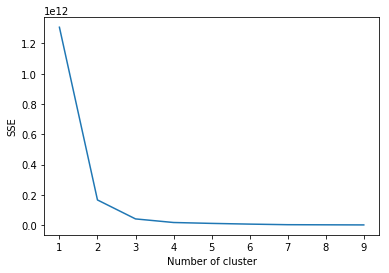

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_train)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [41]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(x_train)
#k_means.labels_

y_kmeans = k_means.predict(x_test)
y_kmeans

from scipy.stats import itemfreq

itemfreq(y_kmeans)

array([[   0, 5770],
       [   1,   32],
       [   2,  231]], dtype=int64)

# # PCA 

- https://archive.ics.uci.edu/ml/datasets/wholesale+customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\paritosh.tiwari\\Documents\\ETA\\Python\\Data Sets\\Wholesale_customers_data.csv")
data = data.drop(["Channel", "Region"], axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


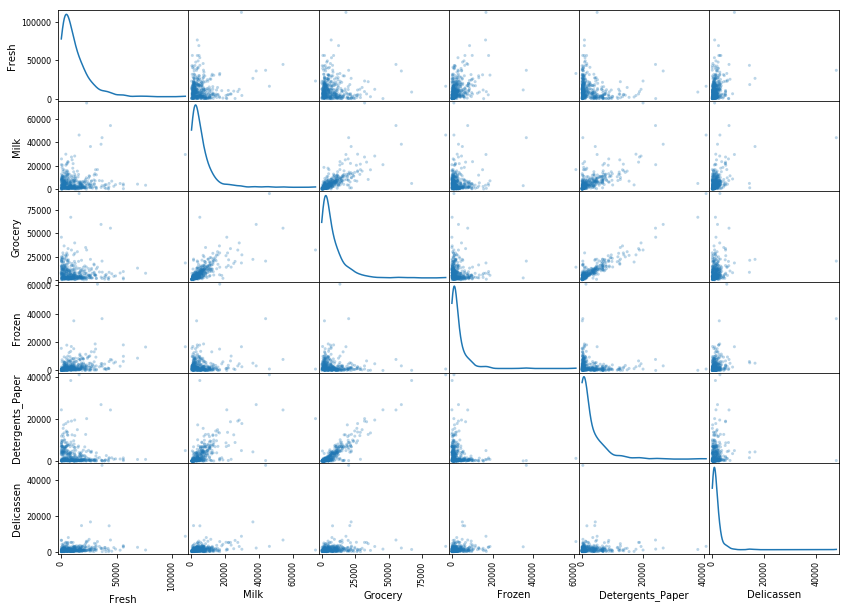

In [2]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal='kde');
plt.show()

In [3]:
from sklearn.preprocessing import scale
data = pd.DataFrame(scale(data), columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

In [5]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)


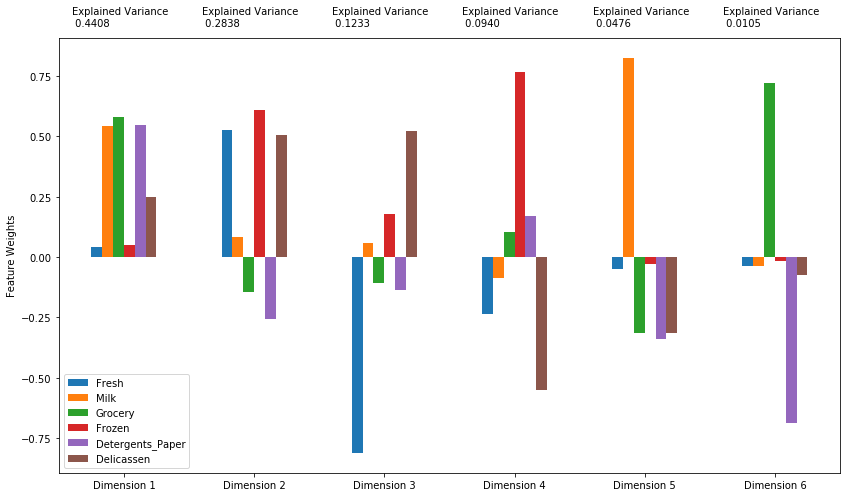

In [6]:
pca_results = pca_results(data, pca)

In [7]:
pca_results.cumsum()

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4408,0.0429,0.5451,0.5793,0.0512,0.5486,0.2487
Dimension 2,0.7246,0.5708,0.6283,0.4332,0.6625,0.2934,0.7529
Dimension 3,0.8479,-0.2415,0.6887,0.3248,0.8409,0.1572,1.2768
Dimension 4,0.9419,-0.4782,0.6015,0.4308,1.6096,0.3289,0.7247
Dimension 5,0.9895,-0.5269,1.4281,0.1158,1.5817,-0.0107,0.4100
Dimension 6,1.0000,-0.5629,1.3901,0.8375,1.5661,-0.6966,0.3349


In [8]:
# create the 2 components
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

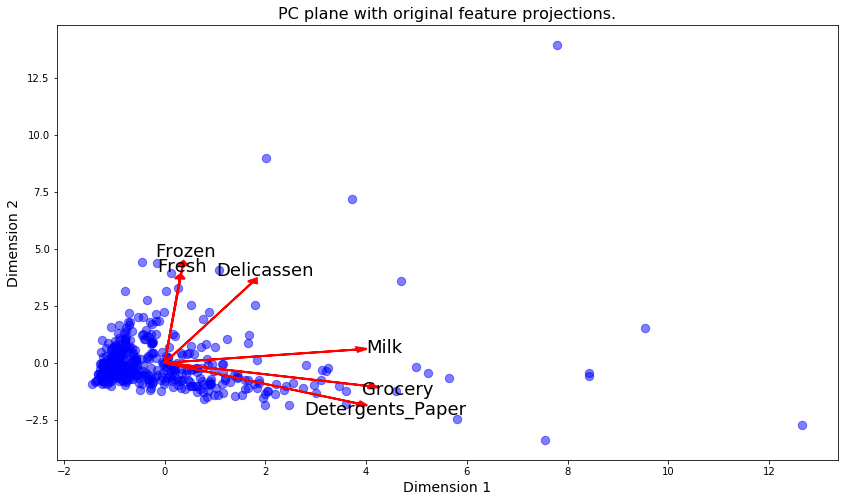

In [9]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot(data, reduced_data, pca)

In [ ]:
y = adt.iloc[:,14]

In [27]:
df1.to_csv("C:\\Users\\paritosh.tiwari\\Desktop\\df1.csv")